In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


I, mean:7.500909090909093, var:4.127269090909091, corr=(0.81642051634484, 0.0021696288730787875)
II, mean:7.500909090909091, var:4.127629090909091, corr=(0.8162365060002427, 0.0021788162369108027)
III, mean:7.500000000000001, var:4.12262, corr=(0.8162867394895982, 0.002176305279228025)
IV, mean:7.50090909090909, var:4.12324909090909, corr=(0.8165214368885029, 0.002164602347197218)


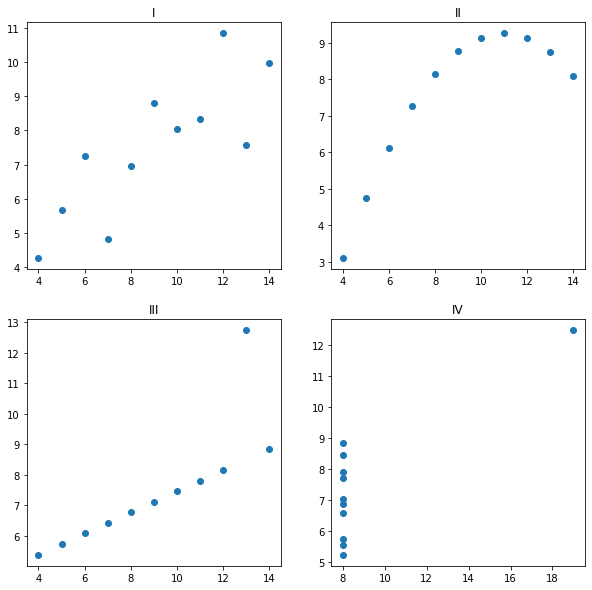

In [4]:
plt.subplots(2, 2, figsize=(10,10))
for index, ds in enumerate( ['I','II','III','IV'] , 1):
    df_tmp = df.query(f"dataset=='{ds}'")
    plt.subplot(2, 2, index)
    plt.scatter(df_tmp.x, df_tmp.y)
    plt.title(ds)
    print(f"{ds}, mean:{df_tmp.y.mean()}, var:{df_tmp.y.var()}, corr={pearsonr(df_tmp.x, df_tmp.y)}")

In [5]:
def estimate_coef(x, y):
    xmean, ymean = np.mean(x), np.mean(y)
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b
    

In [6]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c="g")
    
    a,b = coef
    y_pred = a*x + b
    plt.plot(x, y_pred, c="r")    

In [9]:
np.random.seed(42)
N = 150
X = np.random.randn(N)*6 - 3
y = 2*X + np.random.randn(N)*6

In [11]:
coef = estimate_coef(X, y)
coef

(1.9741641672473753, 0.33710909665765953)

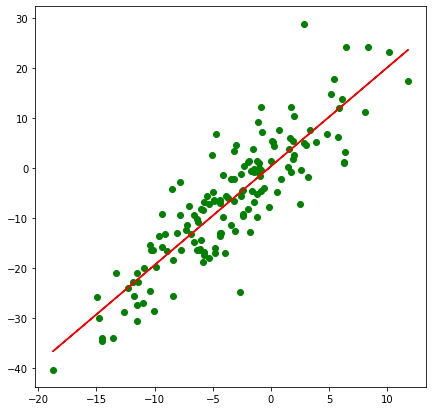

In [12]:
plot_lines(X, y, coef)

In [13]:
pearsonr(X, y)

(0.8765664733653389, 7.368971947550388e-49)

### Użycie biblioteki scikit learn

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
X.ndim

1

In [18]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y)

LinearRegression()

In [19]:
model.coef_, model.intercept_

(array([1.97416417]), 0.3371090966576604)

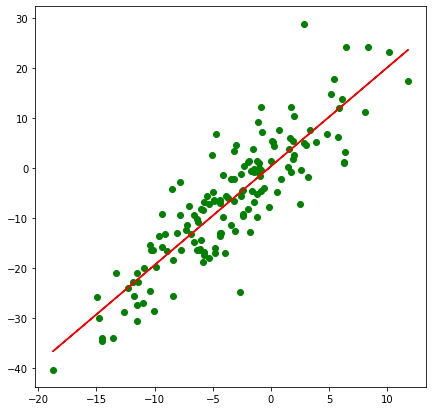

In [20]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [21]:
# metryki
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
y_pred = model.predict(X.reshape(-1,1))

In [27]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)

(4.802299730503761, 37.308580008175745, 0.7683687822281473)

### Efekt lejka

In [29]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [30]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [34]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [35]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

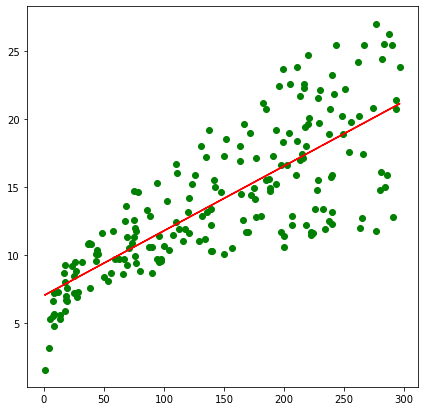

In [37]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [38]:
y_pred = model.predict(X)
r2_score(y, y_pred)

0.611875050850071

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

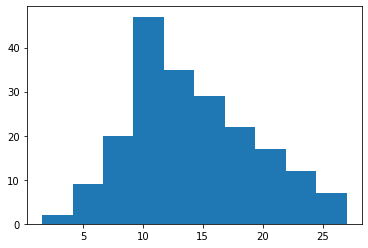

In [39]:
plt.hist(df.sales)

### Regresja wielomianowa

In [42]:
np.random.seed(0)

X = np.arange(-4, 4.2, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X))

X = X.reshape(-1,1)

In [43]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

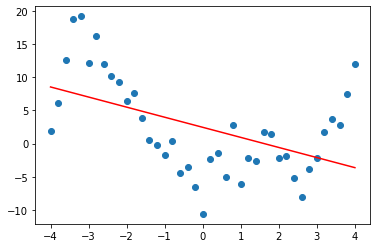

In [46]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')

In [47]:
r2_score(y, y_pred)

0.2456973012029272

In [48]:
# przygotowanie danych X do regresji w stopniu >1
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pf = PolynomialFeatures(degree=3)
X_poly = pf.fit_transform(X)

In [52]:
X[0]

array([-4.])

In [53]:
X_poly[0]

array([  1.,  -4.,  16., -64.])

D=2, R2=0.5697544037009782
D=7, R2=0.8831826910348755
D=13, R2=0.9164987153812483
D=77, R2=0.4288034939646478


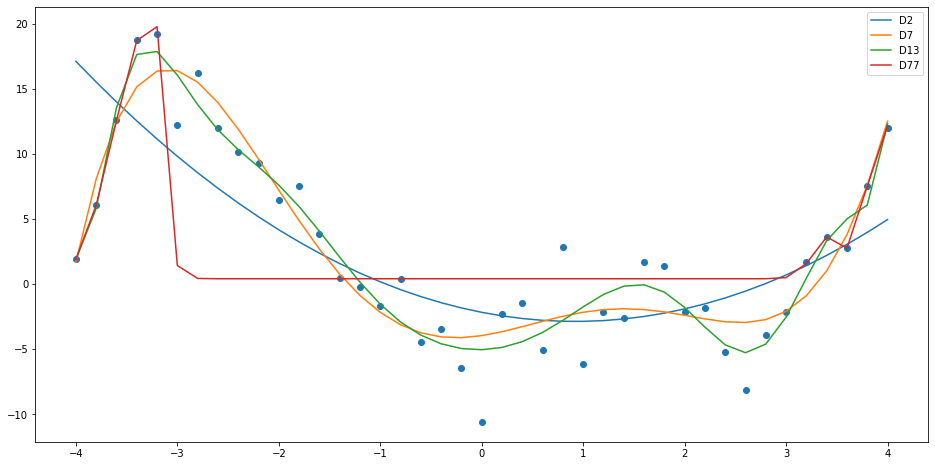

In [64]:
plt.figure(figsize=(16,8))
plt.scatter(X, y)

for degree in [2,7,13,77]: #range(3,25,4):
    pf = PolynomialFeatures(degree)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y,y_pred)}")

plt.legend()
plt.show()

### Regularyzacja

In [66]:
# klasy do regularyzacji
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [67]:
np.random.seed(0)
X = np.unique( np.random.uniform(-3,3,100) )
y = 1/2*(X**2) + X + 2 + np.random.normal(0,1,len(X))

X = X.reshape(-1,1)

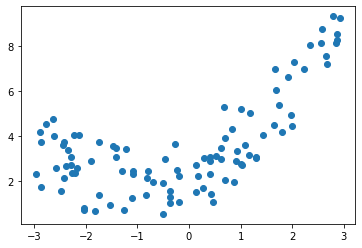

In [68]:
plt.scatter(X, y)

RW: R2=0.8398411453424146
Lasso: R2=0.7560846372182832
Ridge: R2=0.8375368368826693
ElasticNet: R2=0.7609800429915305


C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.8020675781386, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(
C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.31831426733647, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(


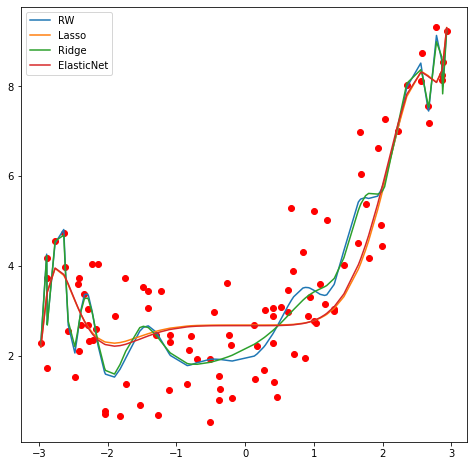

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(X, y, c="r")

pf = PolynomialFeatures(31)
X_poly = pf.fit_transform(X)

# regresja wielomianowa
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="RW")
print(f"RW: R2={r2_score(y, y_pred)}")

# Lasso
model = Lasso()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Lasso")
print(f"Lasso: R2={r2_score(y, y_pred)}")

# Ridge
model = Ridge()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Ridge")
print(f"Ridge: R2={r2_score(y, y_pred)}")

# ElasticNet
model = ElasticNet()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="ElasticNet")
print(f"ElasticNet: R2={r2_score(y, y_pred)}")

plt.legend()

### Regresja wielozmienna

In [81]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [82]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [83]:
df.Height *= 2.54
df.Weight /= 2.2

<AxesSubplot:xlabel='Weight', ylabel='Count'>

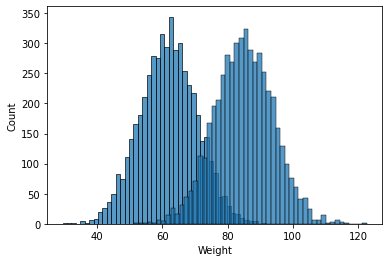

In [87]:
sns.histplot(df.query("Gender=='Female'").Weight)
sns.histplot(df.query("Gender=='Male'").Weight)

In [89]:
df.Gender = df.Gender.map({
    "Male" : 0, "Female": 1
})

In [90]:
df

,Gender,Height,Weight
0,0,187.571423,109.951620
1,0,174.706036,73.777488
2,0,188.239668,96.700389
3,0,182.196685,100.019305
4,0,177.499761,93.795364
...,...,...,...
9995,1,168.078536,62.171570
9996,1,170.350573,77.667230
9997,1,162.224700,58.397872
9998,1,175.346978,74.478392


In [91]:
model = LinearRegression()
model.fit(df[["Gender","Height"]], df.Weight)

LinearRegression()

In [92]:
model.coef_, model.intercept_

(array([-8.80805024,  1.06960294]), -102.52081454490089)

In [96]:
model.predict([ [0, 192] , [1, 170] ])

array([102.84294991,  70.50363499])

In [95]:
model.predict([ [1, 170] ])

array([70.50363499])